In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import model_selection
from sklearn import naive_bayes
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_auc_score
from treeinterpreter import treeinterpreter as ti
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn.grid_search import GridSearchCV 

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import confusion_matrix


from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

import xport
import math
%matplotlib inline

/Users/hector/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/hector/anaconda/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
### Loading in 2 yrs of data, thenmerging together 

In [3]:
df = pd.read_csv('2012-2013.csv')
df1 = pd.read_csv('2013.csv')
df2 = pd.read_csv('2012.csv')

/Users/hector/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1365) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
#df = df[['RIDAGEYR','BMI','DIAB','GRPSTR','INCOME1','INCOME2','INCOME3','INCOME4','INCOME5','INCOME6','INCOME7','INCOME8','INCOME9','INCOME10','INCOME11','INCOME12','DYSVWRK','WALKBIKE','ATEOUT','CARRYOUT','GROCERIES','DLYKCAL','DLYCARB','DLYSGR','DLYFAT','DLYPRT','DYSWLKBK','MNWLKBK','VREC','DYSVREC','MNVREC','MREC','DYSMREC','MNMREC','SDNTRY','MXA','WHT','BLK','ASN','HRSTV','HRSCOMP','SMHS','MWRK','VWRK','DYSMWRK','MNMWRK','DYSVWRK','MNVWRK', 'HSGRAD','SMCOL','COLGRAD','HISP','FRGN','GNDR','CTZN','VET','SEPERATED','DIVORCED','PARTNER','WIDOWED','MARRIED','DLYMFAT','DLYPFAT','DLYSFAT','DLYFBR','DLYMAGN','DLYSODI','DLYIRON',
#'DLYZINC','DLYCOPP','DLYCAFF','DLYBCAR','DLYACAR','DLYPHOS','DLYVARA','DLYRET','DLYATOA','DLYATOC','DLYLYCO','DLYLZ','DLYVB12','DLYVB6','DLYB12A','DLYVC','DLYVD','DLYVB1','DLYPOTA','DLYNIAC','DLYFDFE','DLYVB2','DLYCHL','DLYALCO','DLYFOLA','DLYCRYP','WHLMLK','SLEEPHRS','SLEEPPROB','SLEEPDIS']].dropna(axis=0,how='any')
df1 = df1[['RIDAGEYR','BMI','DIAB','GRPSTR','INCOME1','INCOME2','INCOME3','INCOME4','INCOME5','INCOME6','INCOME7','INCOME8','INCOME9','INCOME10','INCOME11','INCOME12','DYSVWRK','WALKBIKE','ATEOUT','CARRYOUT','GROCERIES','DLYKCAL','DLYCARB','DLYSGR','DLYFAT','DLYPRT','DYSWLKBK','MNWLKBK','VREC','DYSVREC','MNVREC','MREC','DYSMREC','MNMREC','SDNTRY','MXA','WHT','BLK','ASN','HRSTV','HRSCOMP','SMHS','MWRK','VWRK','DYSMWRK','MNMWRK','MNVWRK', 'HSGRAD','SMCOL','COLGRAD','HISP','FRGN','GNDR','CTZN','VET','SEPERATED','DIVORCED','PARTNER','WIDOWED','MARRIED','DLYMFAT','DLYPFAT','DLYSFAT','DLYFBR','DLYMAGN','DLYSODI','DLYIRON',
'DLYZINC','DLYCOPP','DLYCAFF','DLYBCAR','DLYACAR','DLYPHOS','DLYVARA','DLYRET','DLYATOA','DLYATOC','DLYLYCO','DLYLZ','DLYVB12','DLYVB6','DLYB12A','DLYVC','DLYVD','DLYVB1','DLYPOTA','DLYNIAC','DLYFDFE','DLYVB2','DLYCHL','DLYALCO','DLYFOLA','DLYCRYP','WHLMLK','SLEEPHRS','SLEEPPROB','SLEEPDIS']].dropna(axis=0,how='any')

In [198]:
#df[['SDNTRY','MXA','WHT','BLK','ASN','HRSTV','HRSCOMP','SMHS', 'HSGRAD','SMCOL','COLGRAD','HISP','FRGN','GNDR','CTZN','VET','SEPERATED','DIVORCED','PARTNER','WIDOWED','MARRIED','DLYMFAT','DLYPFAT','DLYSFAT','DLYFBR','DLYMAGN','DLYSODI','DLYIRON','DLYKCAL','DLYCARB','DLYSGR','DLYFAT','DLYPRT','DYSWLKBK','MNWLKBK','VREC','DYSVREC','MNVREC','MREC','DYSMREC','MNMREC','GRPSTR','INCOME1','INCOME2','INCOME3','INCOME4','INCOME5','INCOME6','INCOME7','INCOME8','INCOME9','INCOME10','INCOME11','INCOME12','DYSVWRK','WALKBIKE','ATEOUT','CARRYOUT','GROCERIES','OBESE','RIDAGEYR','BMI','MWRK','VWRK','DIAB','DLYZINC','DLYCOPP','DLYCAFF','DLYBCAR','DLYACAR','DLYPHOS','DLYVARA','DLYRET','DLYATOA','DLYATOC','DLYLYCO','DLYLZ','DLYVB12','DLYVB6','DLYB12A','DLYVC','DLYVD','DLYVB1','DLYPOTA','DLYNIAC','DLYFDFE','DLYVB2','DLYATOC','DLYLYCO','DLYLZ','DLYVB12','DLYVB6','DLYB12A','DLYVC']].dropna(axis=0,how='any')
#df = df_.append(df_2)
#df.dropna(axis=0,how=any)
#df_.to_csv('2013(1).csv')
#df_['OBESE'].mean()
len(df1.columns)

98

In [6]:
#df[['RIDAGEYR','BMI','MWRK','VWRK','DIAB','GRPSTR','INCOME1','INCOME2','INCOME3','INCOME4','INCOME5','INCOME6','INCOME7','INCOME8','INCOME9','INCOME10','INCOME11','INCOME12','DYSVWRK','WALKBIKE','ATEOUT','CARRYOUT','GROCERIES','DLYKCAL','DLYCARB','DLYSGR','DLYFAT','DLYPRT','DYSWLKBK','MNWLKBK','VREC','DYSVREC','MNVREC','MREC','DYSMREC','MNMREC','SDNTRY','MXA','WHT','BLK','ASN','HRSTV','HRSCOMP','SMHS', 'HSGRAD','SMCOL','COLGRAD','HISP','FRGN','GNDR','CTZN','VET','SEPERATED','DIVORCED','PARTNER','WIDOWED','MARRIED','DLYMFAT','DLYPFAT','DLYSFAT','DLYFBR','DLYMAGN','DLYSODI','DLYIRON',
#'DLYZINC','DLYCOPP','DLYCAFF','DLYBCAR','DLYACAR','DLYPHOS','DLYVARA','DLYRET','DLYATOA','DLYATOC','DLYLYCO','DLYLZ','DLYVB12','DLYVB6','DLYB12A','DLYVC','DLYVD','DLYVB1','DLYPOTA','DLYNIAC','DLYFDFE','DLYVB2','DLYCHL','DLYALCO','DLYFOLA','DLYCRYP','WHLMLK','SLEEPHRS','SLEEPPROB','SLEEPDIS']].dropna(axis=0,how='any')
df1

,RIDAGEYR,BMI,DIAB,GRPSTR,INCOME1,INCOME2,INCOME3,INCOME4,INCOME5,INCOME6,...,DLYFDFE,DLYVB2,DLYCHL,DLYALCO,DLYFOLA,DLYCRYP,WHLMLK,SLEEPHRS,SLEEPPROB,SLEEPDIS
0,69,26.700000,1,55.200000,0,0.0,0.0,1.0,0.0,0.0,...,273.500000,1.345500,424.900000,0.00000,240.000000,213.500000,1,7.000000,1.0,0.0
1,54,28.600000,1,61.500000,0,0.0,0.0,0.0,0.0,0.0,...,1103.000000,3.869000,1328.400000,81.80000,844.500000,42.500000,1,9.000000,0.0,0.0
2,72,28.900000,1,91.000000,0,0.0,0.0,0.0,0.0,0.0,...,673.500000,1.812500,144.450000,0.00000,445.500000,50.000000,0,8.000000,0.0,0.0
3,9,17.100000,0,32.200000,0,0.0,0.0,0.0,0.0,0.0,...,435.500000,1.747500,188.800000,0.00000,309.500000,152.000000,0,9.000000,0.0,0.0
4,73,19.700000,0,30.900000,0,0.0,0.0,0.0,0.0,0.0,...,690.000000,1.893000,235.300000,0.00000,405.000000,0.000000,0,5.000000,0.0,0.0
5,56,41.700000,0,53.100000,0,0.0,0.0,0.0,0.0,0.0,...,502.665391,1.958901,293.294503,4.76523,374.239428,82.796416,0,9.000000,0.0,1.0
6,0,25.678244,0,63.054891,0,0.0,0.0,0.0,0.0,0.0,...,502.665391,1.958901,293.294503,4.76523,374.239428,82.796416,0,6.000000,0.0,0.0
7,61,35.700000,0,45.900000,0,0.0,0.0,0.0,0.0,0.0,...,684.000000,3.667500,222.700000,17.10000,464.000000,43.500000,0,7.000000,0.0,1.0
8,56,26.500000,0,38.800000,0,0.0,0.0,1.0,0.0,0.0,...,502.665391,1.958901,293.294503,4.76523,374.239428,82.796416,0,8.000000,1.0,0.0
9,65,22.000000,0,43.500000,0,0.0,1.0,0.0,0.0,0.0,...,502.665391,1.958901,293.294503,4.76523,374.239428,82.796416,1,6.000000,0.0,0.0


In [85]:
#df_ = df.dropna(axis=0,how='any')
#df_ = df[['OBESE','RIDAGEYR','BMI','WEIGHT','DIAB','GRPSTR','INCOME1','INCOME2','INCOME3','INCOME4','INCOME5','INCOME6','INCOME7','INCOME8','INCOME9','INCOME10','INCOME11','INCOME12','DYSVWRK','WALKBIKE','ATEOUT','CARRYOUT','GROCERIES','DLYKCAL','DLYCARB','DLYSGR','DLYFAT','DLYPRT','DYSWLKBK','MNWLKBK','VREC','DYSVREC','MNVREC','MREC','DYSMREC','MNMREC','SDNTRY','MXA','WHT','BLK','ASN','HRSTV','HRSCOMP','SMHS','MWRK','VWRK','DYSMWRK','MNMWRK','DYSVWRK','MNVWRK', 'HSGRAD','SMCOL','COLGRAD','HISP','FRGN','GNDR','CTZN','VET','SEPERATED','DIVORCED','PARTNER','WIDOWED','MARRIED','DLYMFAT','DLYPFAT','DLYSFAT','DLYFBR','DLYMAGN','DLYSODI','DLYIRON',
#'DLYZINC','DLYCOPP','DLYCAFF','DLYBCAR','DLYACAR','DLYPHOS','DLYVARA','DLYRET','DLYATOA','DLYATOC','DLYLYCO','DLYLZ','DLYVB12','DLYVB6','DLYB12A','DLYVC','DLYVD','DLYVB1','DLYPOTA','DLYNIAC','DLYFDFE','DLYVB2','DLYCHL','DLYALCO','DLYFOLA','DLYCRYP','WHLMLK','SLEEPHRS','SLEEPPROB','SLEEPDIS']].dropna(axis=0,how='any')
#df2 = df[['OBESE','GRPSTR','INCOME','DYSVWRK','WALKBIKE','ATEOUT','CARRYOUT','GROCERIES','DLYKCAL','DLYCARB','DLYSGR','DLYFAT','DLYPRT','DYSWLKBK','MNWLKBK','VREC','DYSVREC','MNVREC','MREC','DYSMREC','MNMREC','SDNTRY','MXA','WHT','BLK','ASN','HRSTV','HRSCOMP','SMHS', 'HSGRAD','SMCOL','COLGRAD','HISP','FRGN','GNDR','SLEEPHRS','SLEEPPROB','SLEEPDIS']].dropna(axis=0,how='any')

In [5]:
#df2 = df[['OBESE','GRPSTR','INCOME1','INCOME2','INCOME3','INCOME4','INCOME5','INCOME6','INCOME7','INCOME8','INCOME9','INCOME10','INCOME11','INCOME12','DYSVWRK','WALKBIKE','ATEOUT','CARRYOUT','GROCERIES','DLYKCAL','DLYCARB','DLYSGR','DLYFAT','DLYPRT','DYSWLKBK','MNWLKBK','VREC','DYSVREC','MNVREC','MREC','DYSMREC','MNMREC','SDNTRY','MXA','WHT','BLK','ASN','HRSTV','HRSCOMP','SMHS', 'HSGRAD','SMCOL','COLGRAD','HISP','FRGN','GNDR','CTZN','VET','SEPERATED','DIVORCED','PARTNER','WIDOWED','MARRIED','DLYMFAT','DLYPFAT','DLYSFAT','DLYFBR','DLYMAGN','DLYSODI','DLYIRON',
#'DLYZINC','DLYCOPP','DLYCAFF','DLYBCAR','DLYACAR','DLYPHOS','DLYVARA','DLYRET','DLYATOA','DLYATOC','DLYLYCO','DLYLZ','DLYVB12','DLYVB6','DLYB12A','DLYVC','DLYVD','DLYVB1','DLYPOTA','DLYNIAC','DLYFDFE','DLYVB2','DLYCHL','DLYALCO','DLYFOLA','DLYCRYP','WHLMLK','SLEEPHRS','SLEEPPROB','SLEEPDIS']].dropna(axis=0,how='any')
#df = pd.read_csv('2012-2013.csv')
#df

In [6]:
X = df1[['ATEOUT','BMI','RIDAGEYR','CARRYOUT','GROCERIES','GRPSTR','INCOME1','INCOME2','INCOME3','INCOME4','INCOME5','INCOME6','INCOME7','INCOME8','INCOME9','INCOME10','INCOME11','INCOME12','DYSVWRK','WALKBIKE','DLYKCAL','DLYCARB','DLYSGR','DLYFAT','DLYPRT','DYSWLKBK','MNWLKBK','VREC','DYSVREC','MNVREC','MREC','DYSMREC','MNMREC','SDNTRY','VWRK','MNVWRK','MWRK','DYSMWRK','MNMWRK','MXA','WHT','BLK','ASN','HRSTV','HRSCOMP','SMHS', 'HSGRAD','SMCOL','COLGRAD','HISP','FRGN','GNDR','CTZN','VET','SEPERATED','DIVORCED','PARTNER','WIDOWED','MARRIED','DLYMFAT','DLYPFAT','DLYSFAT','DLYFBR','DLYMAGN','DLYSODI','DLYIRON',
'DLYZINC','DLYCOPP','DLYCAFF','DLYBCAR','DLYACAR','DLYPHOS','DLYVARA','DLYRET','DLYATOA','DLYATOC','DLYLYCO','DLYLZ','DLYVB12','DLYVB6','DLYB12A','DLYVC','DLYVD','DLYVB1','DLYPOTA','DLYNIAC','DLYFDFE','DLYVB2','DLYCHL','DLYALCO','DLYFOLA','DLYCRYP','WHLMLK','SLEEPHRS','SLEEPPROB','SLEEPDIS']].dropna(axis=0,how='any')
y = df1['DIAB'].dropna(axis=0,how='any')


In [7]:
train, test = train_test_split(df1, test_size=0.3,random_state=666, stratify = y )
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=666, stratify = y)

In [8]:
#msk = np.random.rand(len(df)) < 0.7
#train = df[msk]
#test = df[~msk]

### Downsampling Majority Class

In [9]:

# Separate majority and minority classes
df_majority = train[train.DIAB==0]
df_minority = train[train.DIAB==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample without replacement
                                 n_samples=5696,     # to match minority class
                                 random_state=666) # reproducible results
 
# Combine minority class with downsampled majority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

y_train = df_upsampled.DIAB
X_train = df_upsampled.drop('DIAB', axis=1)


# Display new class counts
df_upsampled.DIAB.value_counts()
# 1    49
# Display new class counts


1    5696
0    5696
Name: DIAB, dtype: int64

In [10]:

# Separate majority and minority classes
df_majority = test[test.DIAB==0]
df_minority = test[test.DIAB==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample without replacement
                                 n_samples=2442,     # to match minority class
                                 random_state=666) # reproducible results
 
# Combine minority class with downsampled majority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

y_test = df_upsampled.DIAB
X_test = df_upsampled.drop('DIAB', axis=1)


# Display new class counts
df_upsampled.DIAB.value_counts()
# 1    49
# Display new class counts


1    2442
0    2442
Name: DIAB, dtype: int64

### Splitting Data into Testing/Training Sets

In [11]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=666, stratify = y)

In [12]:
#print(clf.feature_importances_)

## Model: Naive Bayes Classifier

In [13]:
##Report for BAYES CLASSIFIER
NB = naive_bayes.GaussianNB()
NB.fit(X_train, y_train)

print("Accuracy: %.3f"% accuracy_score(y_test, NB.predict(X_test)))
print(classification_report(y_test, NB.predict(X_test)))

Accuracy: 0.726
             precision    recall  f1-score   support

          0       0.71      0.77      0.74      2442
          1       0.75      0.69      0.72      2442

avg / total       0.73      0.73      0.73      4884



In [14]:
# ROC Curve Evaluation
prob_y_4 = NB.predict_proba(X_test)
prob_y_4 = [p[1] for p in prob_y_4]
print( roc_auc_score(y_test, prob_y_4) )

0.799482137934


In [15]:
NB_AUC = roc_auc_score(y_test, prob_y_4)

## Model: Random Forest Classifier 

In [16]:
#REPORTS FOR RANDOM FOREST CLASSIFIER
rf = RandomForestClassifier(n_estimators=24,max_depth=7, class_weight='balanced',random_state=666)
rmodel = rf.fit(X_train, y_train)
print("Accuracy: %.3f"% accuracy_score(y_test, rf.predict(X_test)))
print(classification_report(y_test, rf.predict(X_test)))

Accuracy: 0.751
             precision    recall  f1-score   support

          0       0.74      0.78      0.76      2442
          1       0.77      0.72      0.74      2442

avg / total       0.75      0.75      0.75      4884



In [17]:
kfold = model_selection.KFold(n_splits=10, random_state=666)
results = model_selection.cross_val_score(rf, X_test, y_test, cv=kfold)
print(results.mean())

0.903831003386


In [18]:
# ROC Curve Evaluation
prob_y_4 = rf.predict_proba(X_test)
prob_y_4 = [p[1] for p in prob_y_4]
print( roc_auc_score(y_test, prob_y_4) )

0.845014911047


In [19]:
RF_AUC = roc_auc_score(y_test, prob_y_4)

### ROC Evaluation/Visuals

/Users/hector/anaconda/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/Users/hector/anaconda/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/Users/hector/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


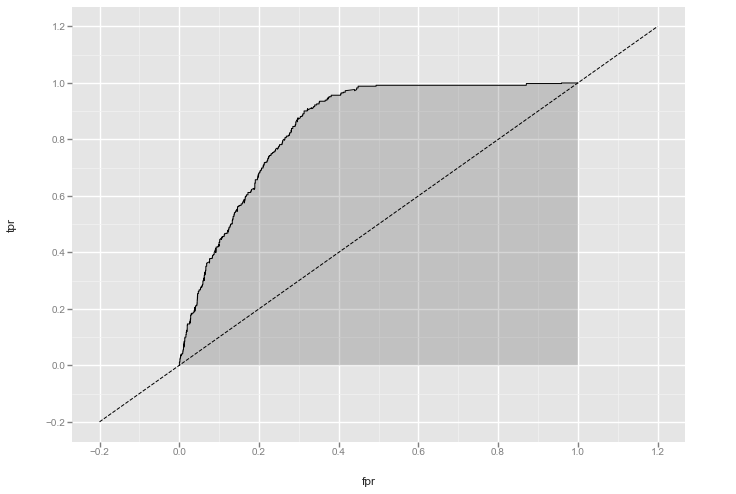

<ggplot: (-9223372036568116273)>

In [20]:
from sklearn import metrics
import pandas as pd
from ggplot import *

preds = rf.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

df_ = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
ggplot(df_, aes(x='fpr', y='tpr')) +\
    geom_area(alpha=0.2) +\
    geom_line() +\
    geom_abline(linetype='dashed') 

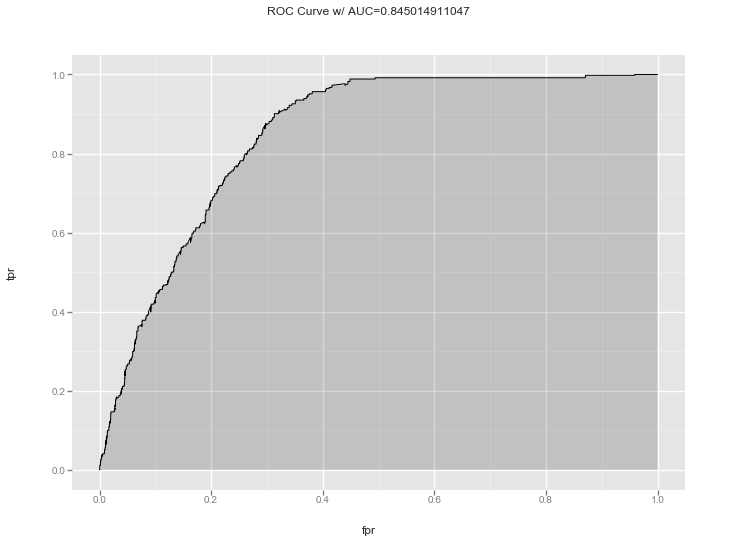

<ggplot: (286659350)>

In [21]:
auc = metrics.auc(fpr,tpr)
ggplot(df_, aes(x='fpr', y='tpr')) +\
    geom_area(alpha=0.2) +\
    geom_line(aes(y='tpr')) +\
    ggtitle("ROC Curve w/ AUC=%s" % str(auc))

### Parameter Tuning

In [19]:
#y_pred = model.predict(X_test)

#depth = list(range(1, 31))
#RF_dep_scores = []
#for k in depth:
#    clf = RandomForestClassifier(max_depth=depth)
#    model = clf.fit(X_train, y_train)
#    scores = metrics.f1_score(y_test, y_pred)
#    RF_dep_scores.append(scores.mean())
#print(RF_dep_scores)
depth = list(range(1, 31))
RFscores = []
for k in depth:
    clf = RandomForestClassifier(max_depth=k)    
    scores = cross_val_score(clf, X_test, y_test, cv=10, scoring='f1')
    RFscores.append(scores.mean())
#print(RFscores)

In [20]:
est = list(range(1, 31))
RF_n_scores = []
for k in est:
    clf = RandomForestClassifier(n_estimators=k)    
    scores = cross_val_score(clf, X_test, y_test, cv=10, scoring='f1')
    RF_n_scores.append(scores.mean())
#print(RF_n_scores)

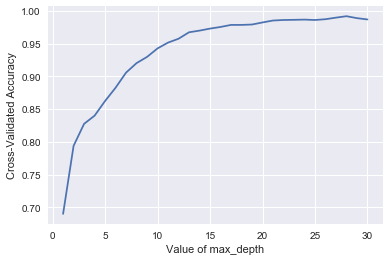

In [21]:
# plot the estimator for RANDOM FOREST (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(depth, RFscores)
plt.xlabel('Value of max_depth')
plt.ylabel('Cross-Validated Accuracy')

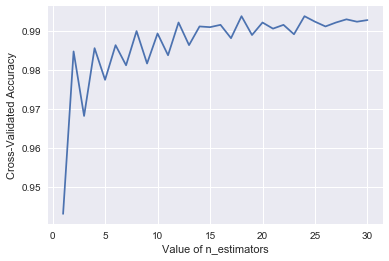

In [22]:
# plot the estimator for RANDOM FOREST (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(est, RF_n_scores)
plt.xlabel('Value of n_estimators')
plt.ylabel('Cross-Validated Accuracy')

## Model: SVC Classifier 

In [26]:
#REPORTS FOR SVC CLASSIFIER

from sklearn.svm import LinearSVC, SVC
from sklearn.preprocessing import scale

X_train = scale(X_train)
X_test = scale(X_test)

SVC = SVC(random_state=666,class_weight='balanced')
SVC_model = SVC.fit(X_train, y_train)

print("Accuracy: %.3f"% accuracy_score(y_test, SVC.predict(X_test)))
print(classification_report(y_test, SVC.predict(X_test)))

Accuracy: 0.681
             precision    recall  f1-score   support

          0       0.63      0.90      0.74      2442
          1       0.82      0.46      0.59      2442

avg / total       0.72      0.68      0.67      4884



### ROC Evaluation/Visualization

In [27]:
def plot_confusion_matrix(cm,title='Confusion matrix',cmap=plt.cm.Reds):
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    sns.set_style("dark")
    sns.despine()
    plt.axis('off')
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

def train_score(classifier,X,y):
    X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y, test_size =.3, random_state=1234)
    X_train = scale(X_train)
    X_test = scale(X_test)
    y_train=np.ravel(y_train)
    model = SVC.fit(X_train,y_train)
    ## accuracy for test and train set
    train_accuracy = SVC.score(X_train,y_train)
    test_accuracy = SVC.score(X_test,y_test)
    
    print("Training Data Accuracy: %0.2f" %(train_accuracy))
    print("Test Data Accuracy:     %0.2f" %(test_accuracy))
    
    y_true = y_test
    y_pred = model.predict(X_test)
    conf = confusion_matrix(y_true,y_pred)
    print(conf)
    
    print('\n')
    print("Precision:        %0.2f" %(conf[0,0] / (conf[0,0] + conf[1,0])))
    print("Recall:           %0.2f" %(conf[0,0]/(conf[0,0] + conf[0,1])))
    cm = confusion_matrix(y_true,y_pred,labels=None)
    plt.figure()
    plot_confusion_matrix(cm)

Training Data Accuracy: 0.97
Test Data Accuracy:     0.68
[[2195  247]
 [1310 1132]]


Precision:        0.63
Recall:           0.90


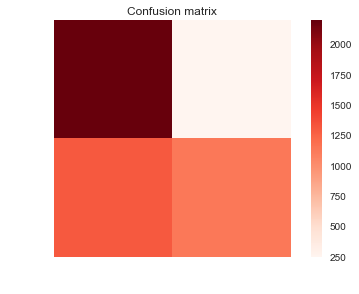

In [28]:
X_train = scale(X_train)
X_test = scale(X_test)
y_train=np.ravel(y_train)
model = SVC.fit(X_train,y_train)
## accuracy for test and train set
train_accuracy = SVC.score(X_train,y_train)
test_accuracy = SVC.score(X_test,y_test)

print("Training Data Accuracy: %0.2f" %(train_accuracy))
print("Test Data Accuracy:     %0.2f" %(test_accuracy))

y_true = y_test
y_pred = model.predict(X_test)
conf = confusion_matrix(y_true,y_pred)
print(conf)

print('\n')
print("Precision:        %0.2f" %(conf[0,0] / (conf[0,0] + conf[1,0])))
print("Recall:           %0.2f" %(conf[0,0]/(conf[0,0] + conf[0,1])))
cm = confusion_matrix(y_true,y_pred,labels=None)
plt.figure()
plot_confusion_matrix(cm)
#plt.savefig('SVC_cm.png')

In [29]:
from sklearn.metrics import average_precision_score

y_score = SVC_model.decision_function(X_test)

average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.5f}'.format(
      average_precision))

Average precision-recall score: 0.81714


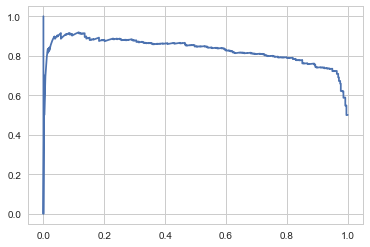

In [775]:
decision_values = SVC_model.decision_function(X_test)

precision, recall, thresholds = precision_recall_curve(y_test, decision_values)

plt.plot(recall, precision)
plt.show()

In [131]:
SVC_AUC = 0.81610

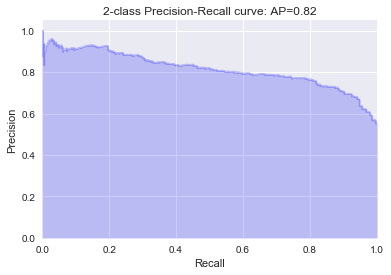

In [41]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_score)


plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,color='b')
                
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
average_precision))


plt.savefig('SVC_prec-rec.png')

 ## Model: Gradient Boost Classifier 

In [24]:
GB = GradientBoostingClassifier(random_state=666,max_depth=2,)
GB_model = GB.fit(X_train, y_train)
print("Accuracy: %.3f"% accuracy_score(y_test, GB.predict(X_test)))
print(classification_report(y_test, GB.predict(X_test)))

Accuracy: 0.807
             precision    recall  f1-score   support

          0       0.85      0.74      0.79      2442
          1       0.77      0.87      0.82      2442

avg / total       0.81      0.81      0.81      4884



In [25]:
# ROC Curve Evaluation
prob_y_4 = GB.predict_proba(X_test)
prob_y_4 = [p[1] for p in prob_y_4]
print( roc_auc_score(y_test, prob_y_4))

0.875803992512


In [106]:
GB_AUC = roc_auc_score(y_test, prob_y_4)

Training Data Accuracy: 0.84
Test Data Accuracy:     0.81
[[1817  625]
 [ 316 2126]]


Precision:        0.85
Recall:           0.74


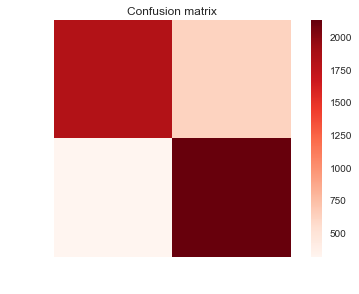

In [157]:
y_train=np.ravel(y_train)
## accuracy for test and train set
train_accuracy = GB_model.score(X_train,y_train)
test_accuracy = GB_model.score(X_test,y_test)

print("Training Data Accuracy: %0.2f" %(train_accuracy))
print("Test Data Accuracy:     %0.2f" %(test_accuracy))

y_true = y_test
y_pred = GB_model.predict(X_test)
conf = confusion_matrix(y_true,y_pred)
print(conf)

print('\n')
print("Precision:        %0.2f" %(conf[0,0] / (conf[0,0] + conf[1,0])))
print("Recall:           %0.2f" %(conf[0,0]/(conf[0,0] + conf[0,1])))
cm = confusion_matrix(y_true,y_pred,labels=None)
plt.figure()
plot_confusion_matrix(cm)
plt.savefig('GB_cm.png')

### Feature Importances

In [34]:
GB_df

,importances,features
0,0.223907,ATEOUT
1,0.097343,BMI
22,0.069659,DLYSGR
89,0.050178,DLYALCO
77,0.041414,DLYLZ
81,0.031894,DLYVC
60,0.023296,DLYPFAT
2,0.021819,RIDAGEYR


In [32]:
GBfeatures = pd.DataFrame()
GBfeatures['importances'] = GB_model.feature_importances_
GBfeatures['features'] = X.columns[0:97]
GBfeatures.sort_values('importances',ascending = False)

GB_df = GBfeatures.sort_values('importances',ascending = False)[0:8]

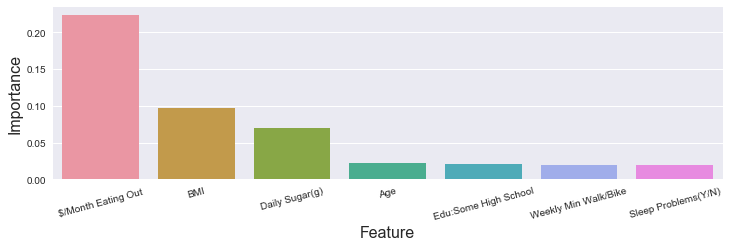

In [87]:
fig, ax = plt.subplots(figsize=(12,5))
sns.set_style("darkgrid")
sns.barplot(x="Feature", y="Importance", data=df_Importances)
plt.xlabel('Feature', fontsize=16)
plt.ylabel('Importance', fontsize=16)
plt.gcf().subplots_adjust(bottom=0.4)
plt.xticks(rotation=15);
fig.savefig('Features.png')

In [84]:
GBfeatures.sort_values(by="importances",ascending=False)

,importances,features
0,0.223907,ATEOUT
1,0.097343,BMI
22,0.069659,DLYSGR
89,0.050178,DLYALCO
77,0.041414,DLYLZ
81,0.031894,DLYVC
60,0.023296,DLYPFAT
2,0.021819,RIDAGEYR
45,0.021389,SMHS
67,0.020894,DLYCOPP


In [82]:
Importances_GB = [0.223907,0.097343,0.069659,0.021819,0.021389,0.020128,0.019393]
Features_GB = ["$/Month Eating Out","BMI","Daily Sugar(g)","Age","Edu:Some High School","Weekly Min Walk/Bike","Sleep Problems(Y/N)"]

In [83]:
Importance_Tuples = list(zip(Importances_GB,Features_GB))
df_Importances = pd.DataFrame(Importance_Tuples, columns=['Importance','Feature'])
#df_Importances.to_csv('Importances_GB.csv')
df_Importances

,Importance,Feature
0,0.223907,$/Month Eating Out
1,0.097343,BMI
2,0.069659,Daily Sugar(g)
3,0.021819,Age
4,0.021389,Edu:Some High School
5,0.020128,Weekly Min Walk/Bike
6,0.019393,Sleep Problems(Y/N)


In [110]:
# ROC Curve Evaluation
prob_y_4 = XGB.predict_proba(X_test)
prob_y_4 = [p[1] for p in prob_y_4]
print( roc_auc_score(y_test, prob_y_4) )

NameError: name 'XGB' is not defined

In [382]:
XGB_AUC = roc_auc_score(y_test, prob_y_4)

## Model: XGboost 

In [111]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams


In [112]:
XGB = XGBClassifier(random_state=666,max_depth=2,n_estimators=80,learning_rate=0.1)
XGB_model = XGB.fit(X_train, y_train)
print("Accuracy: %.3f"% accuracy_score(y_test, XGB.predict(X_test)))
print(classification_report(y_test, XGB.predict(X_test)))


Accuracy: 0.807
             precision    recall  f1-score   support

          0       0.86      0.73      0.79      2442
          1       0.77      0.88      0.82      2442

avg / total       0.81      0.81      0.81      4884



### XGBoost Visualizations

Training Data Accuracy: 0.83
Test Data Accuracy:     0.81
[[1792  650]
 [ 293 2149]]


Precision:        0.86
Recall:           0.73


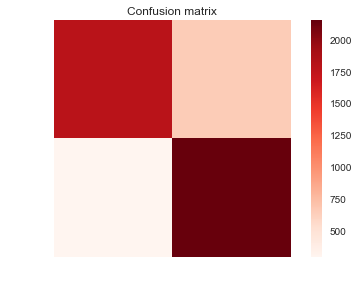

In [158]:
y_train=np.ravel(y_train)
## accuracy for test and train set
train_accuracy = XGB_model.score(X_train,y_train)
test_accuracy = XGB_model.score(X_test,y_test)

print("Training Data Accuracy: %0.2f" %(train_accuracy))
print("Test Data Accuracy:     %0.2f" %(test_accuracy))

y_true = y_test
y_pred = XGB_model.predict(X_test)
conf = confusion_matrix(y_true,y_pred)
print(conf)

print('\n')
print("Precision:        %0.2f" %(conf[0,0] / (conf[0,0] + conf[1,0])))
print("Recall:           %0.2f" %(conf[0,0]/(conf[0,0] + conf[0,1])))
cm = confusion_matrix(y_true,y_pred,labels=None)
plt.figure()
plot_confusion_matrix(cm)
plt.savefig('GB_cm.png')

In [114]:
XGBfeatures = pd.DataFrame()
XGBfeatures['importances'] = XGB_model.feature_importances_
XGBfeatures['features'] = X.columns[0:97]
XGBfeatures.sort_values('importances',ascending = False)

XGB_df = GBfeatures.sort_values('importances',ascending = False)[0:10]

In [115]:
XGB_model.feature_importances_()

TypeError: 'numpy.ndarray' object is not callable

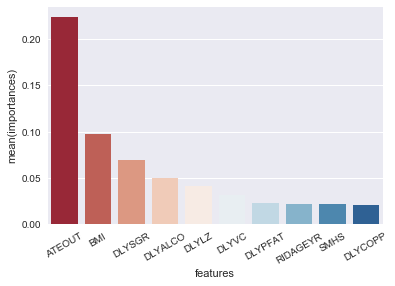

In [123]:
import seaborn as sns
#sns.set_style("whitegrid")
#XGB_df[0:12].plot("features", "importances", kind="barh", color=sns.color_palette("deep", 3))
ax = sns.barplot(x="features", y="importances", data=XGB_df[0:11] ,palette='RdBu')
sns.set_style('darkgrid')
sns.color_palette("coolwarm", 7)
plt.xticks(rotation=30);
fig.savefig('Features.png')

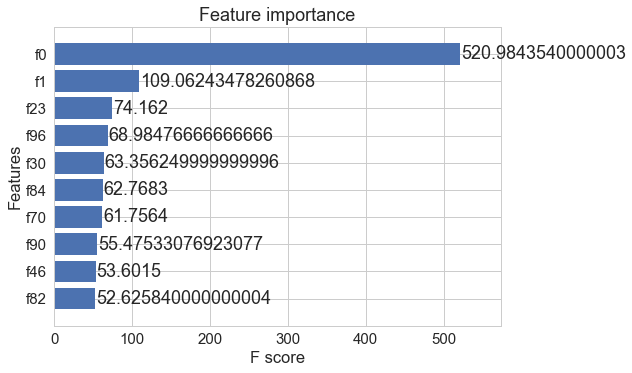

In [326]:
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_tree

xgb.plot_importance(XGB_model,max_num_features=10,height=0.8,importance_type='gain')

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
sns.set_style("whitegrid")
sns.barplot(x="features", y="importances", data=xgb)
plt.xticks(rotation=30);
fig.savefig('Features.png')

In [218]:
# See below two lines
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=['RIDAGEYR','BMI','DIAB','GRPSTR','INCOME1','INCOME2','INCOME3','INCOME4','INCOME5','INCOME6','INCOME7','INCOME8','INCOME9','INCOME10','INCOME11','INCOME12','DYSVWRK','WALKBIKE','ATEOUT','CARRYOUT','GROCERIES','DLYKCAL','DLYCARB','DLYSGR','DLYFAT','DLYPRT','DYSWLKBK','MNWLKBK','VREC','DYSVREC','MNVREC','MREC','DYSMREC','MNMREC','SDNTRY','MXA','WHT','BLK','ASN','HRSTV','HRSCOMP','SMHS','MWRK','VWRK','DYSMWRK','MNMWRK','MNVWRK', 'HSGRAD','SMCOL','COLGRAD','HISP','FRGN','GNDR','CTZN','VET','SEPERATED','DIVORCED','PARTNER','WIDOWED','MARRIED','DLYMFAT','DLYPFAT','DLYSFAT','DLYFBR','DLYMAGN','DLYSODI','DLYIRON',
'DLYZINC','DLYCOPP','DLYCAFF','DLYBCAR','DLYACAR','DLYPHOS','DLYVARA','DLYRET','DLYATOA','DLYATOC','DLYLYCO','DLYLZ','DLYVB12','DLYVB6','DLYB12A','DLYVC','DLYVD','DLYVB1','DLYPOTA','DLYNIAC','DLYFDFE','DLYVB2','DLYCHL','DLYALCO','DLYFOLA','DLYCRYP','WHLMLK','SLEEPHRS','SLEEPPROB','SLEEPDIS'])

In [219]:
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=['RIDAGEYR','BMI','DIAB','GRPSTR','INCOME1','INCOME2','INCOME3','INCOME4','INCOME5','INCOME6','INCOME7','INCOME8','INCOME9','INCOME10','INCOME11','INCOME12','DYSVWRK','WALKBIKE','ATEOUT','CARRYOUT','GROCERIES','DLYKCAL','DLYCARB','DLYSGR','DLYFAT','DLYPRT','DYSWLKBK','MNWLKBK','VREC','DYSVREC','MNVREC','MREC','DYSMREC','MNMREC','SDNTRY','MXA','WHT','BLK','ASN','HRSTV','HRSCOMP','SMHS','MWRK','VWRK','DYSMWRK','MNMWRK','MNVWRK', 'HSGRAD','SMCOL','COLGRAD','HISP','FRGN','GNDR','CTZN','VET','SEPERATED','DIVORCED','PARTNER','WIDOWED','MARRIED','DLYMFAT','DLYPFAT','DLYSFAT','DLYFBR','DLYMAGN','DLYSODI','DLYIRON',
'DLYZINC','DLYCOPP','DLYCAFF','DLYBCAR','DLYACAR','DLYPHOS','DLYVARA','DLYRET','DLYATOA','DLYATOC','DLYLYCO','DLYLZ','DLYVB12','DLYVB6','DLYB12A','DLYVC','DLYVD','DLYVB1','DLYPOTA','DLYNIAC','DLYFDFE','DLYVB2','DLYCHL','DLYALCO','DLYFOLA','DLYCRYP','WHLMLK','SLEEPHRS','SLEEPPROB','SLEEPDIS'])

In [225]:
evallist = [(dtest, 'eval'), (dtrain, 'train')]
param = {'max_depth': 2, 'objective': 'binary:logistic'}
bst = xgb.train(param, dtrain,10, evallist)

[0]	eval-error:0.21683	train-error:0.207163
[1]	eval-error:0.214578	train-error:0.19777
[2]	eval-error:0.214373	train-error:0.201018
[3]	eval-error:0.210074	train-error:0.197331
[4]	eval-error:0.205979	train-error:0.193557
[5]	eval-error:0.203931	train-error:0.191187
[6]	eval-error:0.204136	train-error:0.191187
[7]	eval-error:0.203931	train-error:0.192328
[8]	eval-error:0.203726	train-error:0.192504
[9]	eval-error:0.200655	train-error:0.187851


In [ ]:
#xgb.plot_importance(bst,height=.3)
ypred = bst.predict(dtest, ntree_limit=bst.best_ntree_limit)
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0
# ROC Curve Evaluation
prob_y_4 = [p[1] for p in y_pred]
print( roc_auc_score(y_test, prob_y_4) )

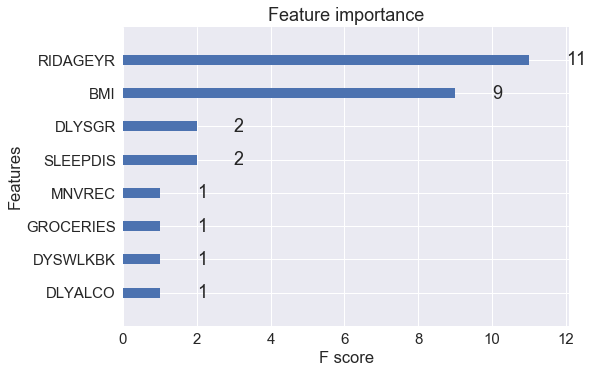

In [310]:
import seaborn as sns
sns.set(font_scale = 1.5)
xgb.plot_importance(bst,height=.3)

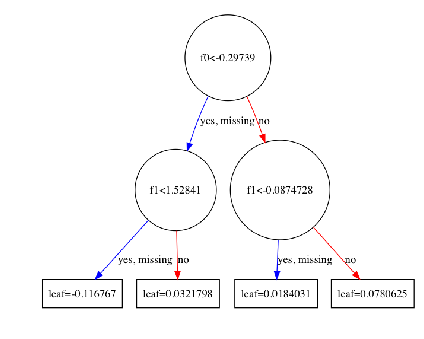

In [331]:
xgb.plot_tree(XGB,num_trees=5)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Model: KNN Classifier

In [95]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.84125960195530725, 0.90075805566640066, 0.88814358040702301, 0.90522433659217882, 0.90008928571428581, 0.90734524640861947, 0.90645201516360741, 0.90812674581005592, 0.90790353152434167, 0.90835008479648827, 0.90846169193934556, 0.90846169193934556, 0.90835008479648827, 0.90846169193934556, 0.90846169193934556, 0.90846169193934556, 0.90846169193934556, 0.90846169193934556, 0.90846169193934556, 0.90846169193934556, 0.90846169193934556, 0.90846169193934556, 0.90846169193934556, 0.90846169193934556, 0.90846169193934556, 0.90846169193934556, 0.90846169193934556, 0.90846169193934556, 0.90846169193934556, 0.90846169193934556]


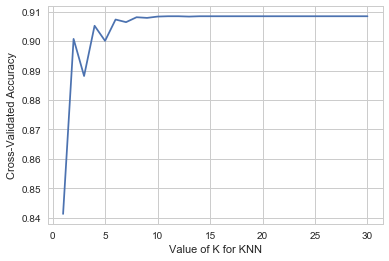

In [96]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [102]:
knn = KNeighborsClassifier(n_neighbors=20)
model = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.669533169533


In [103]:
print("Accuracy: %.3f"% accuracy_score(y_test, model.predict(X_test)))
print(classification_report(y_test, model.predict(X_test)))

Accuracy: 0.670
             precision    recall  f1-score   support

          0       0.64      0.78      0.70      2442
          1       0.72      0.56      0.63      2442

avg / total       0.68      0.67      0.67      4884



In [104]:
# ROC Curve Evaluation
prob_y_4 = knn.predict_proba(X_test)
prob_y_4 = [p[1] for p in prob_y_4]
print( roc_auc_score(y_test, prob_y_4) )

0.746138169664


## Model: Logistic Regression 

In [128]:
from sklearn.linear_model import LogisticRegression

X_train = scale(X_train)
X_test = scale(X_test)

logit = LogisticRegression(C=10.0,class_weight='balanced',random_state=666)
Log_model = logit.fit(X_train,y_train)


In [129]:
print("Accuracy: %.3f"% accuracy_score(y_test, Log_model.predict(X_test)))
print(classification_report(y_test, Log_model.predict(X_test)))

Accuracy: 0.799
             precision    recall  f1-score   support

          0       0.82      0.77      0.79      2442
          1       0.78      0.83      0.81      2442

avg / total       0.80      0.80      0.80      4884



In [130]:
# ROC Curve Evaluation
prob_y_4 = Log_model.predict_proba(X_test)
prob_y_4 = [p[1] for p in prob_y_4]
Log_AUC = roc_auc_score(y_test, prob_y_4)
print( roc_auc_score(y_test, prob_y_4) )


0.866597108612


Training Data Accuracy: 0.83
Test Data Accuracy:     0.80
[[1869  573]
 [ 410 2032]]


Precision:        0.82
Recall:           0.77


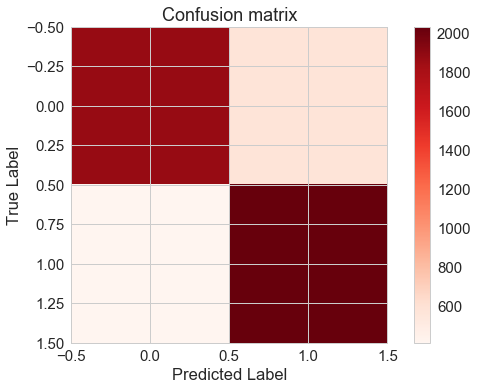

In [374]:
y_train=np.ravel(y_train)
## accuracy for test and train set
train_accuracy = Log_model.score(X_train,y_train)
test_accuracy = Log_model.score(X_test,y_test)

print("Training Data Accuracy: %0.2f" %(train_accuracy))
print("Test Data Accuracy:     %0.2f" %(test_accuracy))

y_true = y_test
y_pred = Log_model.predict(X_test)
conf = confusion_matrix(y_true,y_pred)
print(conf)

print('\n')
print("Precision:        %0.2f" %(conf[0,0] / (conf[0,0] + conf[1,0])))
print("Recall:           %0.2f" %(conf[0,0]/(conf[0,0] + conf[0,1])))
cm = confusion_matrix(y_true,y_pred,labels=None)
plt.figure()
plot_confusion_matrix(cm)
plt.savefig('Log_cm.png')

In [519]:
#Log_model.coef_
#Log_df = Log_model.coef_('importances',ascending = False)[0:10]
X.columns[0:97]

Index(['ATEOUT', 'BMI', 'RIDAGEYR', 'CARRYOUT', 'GROCERIES', 'GRPSTR',
       'INCOME1', 'INCOME2', 'INCOME3', 'INCOME4', 'INCOME5', 'INCOME6',
       'INCOME7', 'INCOME8', 'INCOME9', 'INCOME10', 'INCOME11', 'INCOME12',
       'DYSVWRK', 'DYSVWRK', 'WALKBIKE', 'DLYKCAL', 'DLYCARB', 'DLYSGR',
       'DLYFAT', 'DLYPRT', 'DYSWLKBK', 'MNWLKBK', 'VREC', 'DYSVREC', 'MNVREC',
       'MREC', 'DYSMREC', 'MNMREC', 'SDNTRY', 'VWRK', 'DYSVWRK', 'DYSVWRK',
       'MNVWRK', 'MWRK', 'DYSMWRK', 'MNMWRK', 'MXA', 'WHT', 'BLK', 'ASN',
       'HRSTV', 'HRSCOMP', 'SMHS', 'HSGRAD', 'SMCOL', 'COLGRAD', 'HISP',
       'FRGN', 'GNDR', 'CTZN', 'VET', 'SEPERATED', 'DIVORCED', 'PARTNER',
       'WIDOWED', 'MARRIED', 'DLYMFAT', 'DLYPFAT', 'DLYSFAT', 'DLYFBR',
       'DLYMAGN', 'DLYSODI', 'DLYIRON', 'DLYZINC', 'DLYCOPP', 'DLYCAFF',
       'DLYBCAR', 'DLYACAR', 'DLYPHOS', 'DLYVARA', 'DLYRET', 'DLYATOA',
       'DLYATOC', 'DLYLYCO', 'DLYLZ', 'DLYVB12', 'DLYVB6', 'DLYB12A', 'DLYVC',
       'DLYVD', 'DLYVB1', 'DLYPOTA'

In [67]:
#Logfeatures = pd.DataFrame()
#Logfeatures['Log_Odds'] = [ 0.76631216, -0.23582344, -0.11844303, 
#        -0.03901901, -0.11057547, 0.046631, -0.086025, 0.085269,-0.209237,1.43672385,0.122201, -1.536005,0.444722,1.536005,0.444722,1.511677,, 0.005882 , -0.441232,-0.235727,0.217422,-.953585]
#"Logfeatures['Features'] = X.columns[0:97]

#abs(Logfeatures).sort_values('Log_Odds',ascending = False)[0:10]
e = 2.71828



In [70]:
Log_Odds = [1.43674477,  0.76631131, -0.23581555, -0.03547486, -0.11845917,
        -0.03904193, -0.11060521, -0.13517746,  0.04659464, -0.01546438,
        -0.01365714, -0.07969564, -0.06292898, -0.07956103, -0.08606231,
        -0.016083  , -0.17042706,  0.06858638, -0.04537102,  0.01268452,
        -1.53612841,  0.44491031, -0.21753231,  1.51174034,  0.00586071,
         0.07226269,  0.22320224, -0.44119872,  0.2886082 ,  0.036775  ,
         0.35442429, -0.22095498, -0.19900006, -0.06268095, -0.00885497,
        -0.28347124, -0.06983603, -0.07121495,  0.03762416,  0.08766017,
        -0.02818529, -0.00679164, -0.23574043,  0.08026458,  0.04588779,
         0.12219698, -0.11451075, -0.14255117, -0.20923417, -0.12252252,
         0.08526893,  0.21742865,  0.07632335,  0.04667659,  0.12825219,
         0.07652476,  0.08566651, -0.03700768,  0.10495762, -0.3952989 ,
        -0.10548398, -0.33088638,  0.11905319,  0.13599481,  0.43745889,
        -0.24482117,  0.03032986, -0.09694832,  0.15235708,  0.6851924 ,
         0.0407129 ,  0.15177236, -0.95355912,  0.76656718,  0.01297415,
        -0.14674981,  0.05281951, -0.13515985,  0.04202013, -0.31396697,
         0.23367509, -0.1087353 , -0.06552736,  0.26712748,  0.04912715,
         0.09647429,  0.9246837 , -0.32161083,  0.32258845, -0.05523982,
        -0.8810506 ,  0.14824107, -0.06815347, -0.00263492,  0.22923829,
         0.16579761]
Columns = ['ATEOUT', 'BMI', 'RIDAGEYR', 'CARRYOUT', 'GROCERIES', 'GRPSTR',
       'INCOME1', 'INCOME2', 'INCOME3', 'INCOME4', 'INCOME5', 'INCOME6',
       'INCOME7', 'INCOME8', 'INCOME9', 'INCOME10', 'INCOME11', 'INCOME12',
       'DYSVWRK', 'WALKBIKE', 'DLYKCAL', 'DLYCARB', 'DLYSGR', 'DLYFAT',
       'DLYPRT', 'DYSWLKBK', 'MNWLKBK', 'VREC', 'DYSVREC', 'MNVREC', 'MREC',
       'DYSMREC', 'MNMREC', 'SDNTRY', 'VWRK', 'MNVWRK', 'MWRK', 'DYSMWRK',
       'MNMWRK', 'MXA', 'WHT', 'BLK', 'ASN', 'HRSTV', 'HRSCOMP', 'SMHS',
       'HSGRAD', 'SMCOL', 'COLGRAD', 'HISP', 'FRGN', 'GNDR', 'CTZN', 'VET',
       'SEPERATED', 'DIVORCED', 'PARTNER', 'WIDOWED', 'MARRIED', 'DLYMFAT',
       'DLYPFAT', 'DLYSFAT', 'DLYFBR', 'DLYMAGN', 'DLYSODI', 'DLYIRON',
       'DLYZINC', 'DLYCOPP', 'DLYCAFF', 'DLYBCAR', 'DLYACAR', 'DLYPHOS',
       'DLYVARA', 'DLYRET', 'DLYATOA', 'DLYATOC', 'DLYLYCO', 'DLYLZ',
       'DLYVB12', 'DLYVB6', 'DLYB12A', 'DLYVC', 'DLYVD', 'DLYVB1', 'DLYPOTA',
       'DLYNIAC', 'DLYFDFE', 'DLYVB2', 'DLYCHL', 'DLYALCO', 'DLYFOLA',
       'DLYCRYP', 'WHLMLK', 'SLEEPHRS', 'SLEEPPROB', 'SLEEPDIS']

In [71]:
Odds = []
for x in Log_Odds:
    Odds.append(e**x)
print(Odds)
    

[4.206974753706116, 2.151813111734024, 0.7899264877135029, 0.9651470207511197, 0.8882881544993149, 0.9617104090406711, 0.895292198157841, 0.8735609552497836, 1.0476971956054735, 0.9846545897657376, 0.9864357046947684, 0.9233973983396203, 0.9390101995703213, 0.9235217051460773, 0.9175371108211277, 0.9840456515231284, 0.8433046946977026, 1.0709930839322737, 0.9556428826037789, 1.0127653011143274, 0.21521292830784206, 1.5603497747771886, 0.8045017287705067, 4.534611093066069, 1.0058779135952074, 1.0749376301080038, 1.2500731753270138, 0.6432650551811424, 1.3345684829650837, 1.0374595405096698, 1.4253594843076398, 0.8017528935489049, 0.8195499538631875, 0.9392431309992356, 0.9911841256859539, 0.753164926459479, 0.9325467608622803, 0.931261740520903, 1.0383408832077745, 1.091617030384321, 0.9722082280839468, 0.9932313756006819, 0.7899858291801813, 1.083573663184764, 1.0469568930129938, 1.1299765697828834, 0.8918024201832584, 0.8671432645885278, 0.8112053676366158, 0.8846860545023341, 1.0890

In [72]:
Log_Tuples = list(zip(Odds,Columns))
Log_Tuples

[(4.206974753706116, 'ATEOUT'),
 (2.151813111734024, 'BMI'),
 (0.7899264877135029, 'RIDAGEYR'),
 (0.9651470207511197, 'CARRYOUT'),
 (0.8882881544993149, 'GROCERIES'),
 (0.9617104090406711, 'GRPSTR'),
 (0.895292198157841, 'INCOME1'),
 (0.8735609552497836, 'INCOME2'),
 (1.0476971956054735, 'INCOME3'),
 (0.9846545897657376, 'INCOME4'),
 (0.9864357046947684, 'INCOME5'),
 (0.9233973983396203, 'INCOME6'),
 (0.9390101995703213, 'INCOME7'),
 (0.9235217051460773, 'INCOME8'),
 (0.9175371108211277, 'INCOME9'),
 (0.9840456515231284, 'INCOME10'),
 (0.8433046946977026, 'INCOME11'),
 (1.0709930839322737, 'INCOME12'),
 (0.9556428826037789, 'DYSVWRK'),
 (1.0127653011143274, 'WALKBIKE'),
 (0.21521292830784206, 'DLYKCAL'),
 (1.5603497747771886, 'DLYCARB'),
 (0.8045017287705067, 'DLYSGR'),
 (4.534611093066069, 'DLYFAT'),
 (1.0058779135952074, 'DLYPRT'),
 (1.0749376301080038, 'DYSWLKBK'),
 (1.2500731753270138, 'MNWLKBK'),
 (0.6432650551811424, 'VREC'),
 (1.3345684829650837, 'DYSVREC'),
 (1.0374595405096698

In [77]:
df_Odds = pd.DataFrame(Log_Tuples, columns=['Odds','Feature'])
#df_Odds.to_csv('Odds.csv')
df_Odds.sort_values(by="Odds",ascending=False)

,Odds,Feature
23,4.534611,DLYFAT
0,4.206975,ATEOUT
86,2.521069,DLYFDFE
73,2.152364,DLYRET
1,2.151813,BMI
69,1.984153,DLYBCAR
21,1.560350,DLYCARB
64,1.548766,DLYSODI
30,1.425359,MREC
88,1.380697,DLYCHL


In [148]:
Sorted_Odds = df_Odds.sort_values(by='Odds',ascending=False)
Sorted_Odds.to_csv('SortedOdds.csv')

In [127]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier


DT = DecisionTreeClassifier(class_weight='balanced',random_state=0)
DT.fit(X_train,y_train)


print("Accuracy: %.3f"% accuracy_score(y_test, DT.predict(X_test)))
print(classification_report(y_test, DT.predict(X_test)))

Accuracy: 0.578
             precision    recall  f1-score   support

          0       0.55      0.92      0.69      2442
          1       0.74      0.24      0.36      2442

avg / total       0.65      0.58      0.52      4884



In [628]:
#Logfeatures = Logfeatures[['Log_Odds','Features']]
#Logfeatures = Logfeatures.set_index('Features')
#Log_abs = Logfeatures.abs()
#Log_abs.sort_values('Log_Odds',ascending=False)

#Log_plot = Logfeatures.reset_index(drop=True)
#Log_plot['Index'] = range(0,97)
Values = [ 1.511677,1.43672385, 0.76631216,0.444722, 0.217422,0.122201,0.085269,0.046631,0.005882, -0.086025,  
        -0.11057547,-0.118443,-0.209237,-0.235727,-0.23582344,
        -0.283504,-0.441232,-1.536005]
Columns = ['DLYFAT','ATEOUT','BMI','DLYCARB','HISP','HRSTV','COLGRAD','INCOME3','DLYPRT','INCOME1','INCOME9','GROCERIES','HSGRAD','WHT','RIDAGEYR','DYSVWRK','VREC','DLYKCAL']
Log_plots = pd.DataFrame(dict(Feature=Columns,Log_Odds=Values))


In [73]:
print(e**1.43674477)

4.206974753706116


In [69]:
#Log_Plot = Logfeatures[['RIDAGEYR','DLYKCAL','BMI','ATEOUT','DLYFAT','DLYCARB','DLYSGR','VREC','WHT','HISP','BLK','ASN','INCOME1','INCOME2','INCOME3','INCOME10','INCOME11','INCOME12']]
#Log_plot = Logfeatures.iloc[2:20]
#Log_plot
#Log_plot = Log_plot.pivot(index='Index', columns='Features', values='Log_Odds')
#Feature_List = Log_plot.sum()
#Log_plot.sort_values(by='Log_Ods',ascending=True).head(50)
Sorted_Odds

NameError: name 'Sorted_Odds' is not defined

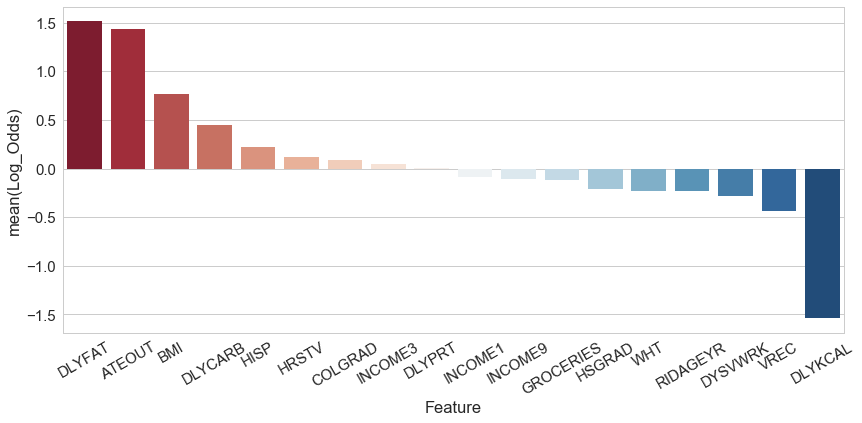

In [634]:
fig, ax = plt.subplots()
sns.barplot(x="Feature", y="Log_Odds", data=Log_plots,palette='RdBu')
fig.set_size_inches(14, 6)
plt.xticks(rotation=30);   #GBfeatures.sort_values('importances',ascending = False)[0:10]
fig.savefig('LogOdds.png') 

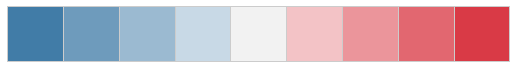

In [591]:
sns.palplot(sns.diverging_palette(240, 10, n=9))

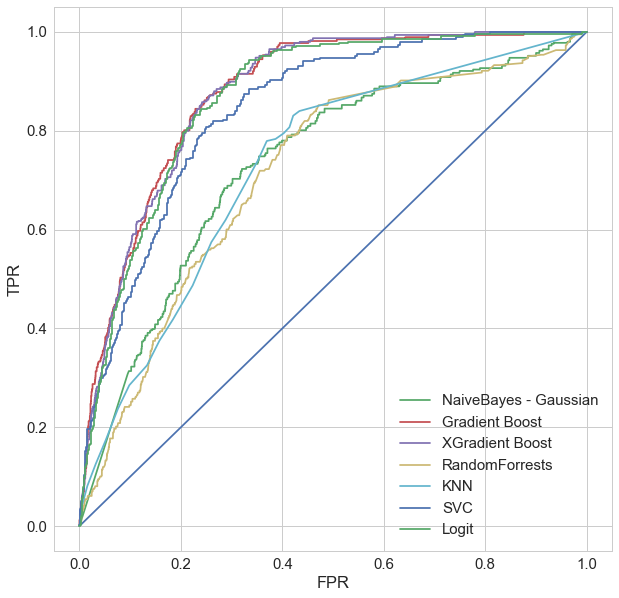

In [398]:
nb_score = NB.predict_proba(X_test)[:,1]
rf_score = rf.predict_proba(X_test)[:,1]
knn_score = knn.predict_proba(X_test)[:,1]
GB_score = GB_model.predict_proba(X_test)[:,1]
XGB_score = XGB_model.predict_proba(X_test)[:,1]
Logit_score = Log_model.predict_proba(X_test)[:,1]



nb_fpr, nb_tpr,_ = roc_curve(y_test, nb_score)
GB_fpr, GB_tpr,_ = roc_curve(y_test, GB_score)
XGB_fpr, XGB_tpr,_ = roc_curve(y_test, XGB_score)
knn_fpr, knn_tpr,_ = roc_curve(y_test, knn_score)
rf_fpr, rf_tpr,_ = roc_curve(y_test, rf_score)
SVC_fpr, SVC_tpr, _ = roc_curve(y_test, y_score)
Logit_fpr, Logit_tpr,_ = roc_curve(y_test, Logit_score)



plt.figure(figsize = (10,10))
plt.subplot(1,1,1)

plt.plot([0,1],[0,1])

plt.plot(nb_fpr,nb_tpr, label = 'NaiveBayes - Gaussian')
plt.plot(GB_fpr,GB_tpr, label = 'Gradient Boost')
plt.plot(XGB_fpr,XGB_tpr, label = 'XGradient Boost')
plt.plot(rf_fpr,rf_tpr, label = 'RandomForrests')
plt.plot(knn_fpr,knn_tpr, label = 'KNN')
plt.plot(SVC_fpr, SVC_tpr, label = 'SVC')
plt.plot(Logit_fpr, Logit_tpr, label = 'Logit')

### PRINT AUC SCORES: roc_auc_score(y_test, prob_y_4)

plt.legend()
plt.grid(True)
plt.xlabel('FPR')
plt.ylabel('TPR')

#plt.savefig('RocCurve.png')

In [49]:
treeToJson('tree.dot',feature_names=None)

In [47]:
def treeToJson(decision_tree, feature_names=None):
    from warnings import warn
 
    js = ""

    def node_to_str(tree, node_id, criterion):
        if not isinstance(criterion, sklearn.tree.tree.six.string_types):
            criterion = "impurity"

            value = tree.value[node_id]
        if tree.n_outputs == 1:
            value = value[0, :]

            jsonValue = ', '.join([str(x) for x in value])

        if tree.children_left[node_id] == sklearn.tree._tree.TREE_LEAF:
            return '"id": "%s", "criterion": "%s", "impurity": "%s", "samples": "%s", "value": [%s]' \
                 % (node_id, 
                    criterion,
                    tree.impurity[node_id],
                    tree.n_node_samples[node_id],
                    jsonValue)
        else:
            if feature_names is not None:
                feature = feature_names[tree.feature[node_id]]
            else:
                feature = tree.feature[node_id]

            if "=" in feature:
                ruleType = "="
                ruleValue = "false"
            else:
                ruleType = "<="
                ruleValue = "%.4f" % tree.threshold[node_id]

            return '"id": "%s", "rule": "%s %s %s", "%s": "%s", "samples": "%s"' \
                 % (node_id, 
                    feature,
                    ruleType,
                    ruleValue,
                    criterion,
                    tree.impurity[node_id],
                    tree.n_node_samples[node_id])

    def recurse(tree, node_id, criterion, parent=None, depth=0):
        tabs = "  " * depth
        js = ""

        left_child = tree.children_left[node_id]
        right_child = tree.children_right[node_id]

        js = js + "\n" + \
             tabs + "{\n" + \
             tabs + "  " + node_to_str(tree, node_id, criterion)

        if left_child != sklearn.tree._tree.TREE_LEAF:
            js = js + ",\n" + \
            tabs + '  "left": ' + \
            recurse(tree, \
                       left_child, \
                       criterion=criterion, \
                       parent=node_id, \
                       depth=depth + 1) + ",\n" + \
            tabs + '  "right": ' + \
            recurse(tree, \
                       right_child, \
                       criterion=criterion, \
                       parent=node_id,
                       depth=depth + 1)

            js = js + tabs + "\n" + \
             tabs + "}"

        return js

        if isinstance(decision_tree, sklearn.tree.tree.Tree):
            js = js + recurse(decision_tree, 0, criterion="impurity")
        else:
            js = js + recurse(decision_tree.tree_, 0, criterion=decision_tree.criterion)

        return js

    

In [38]:
# Limit depth of tree to 3 levels
#XGB_small = XGBClassifier(random_state = 666, max_depth = 3)
#XGB_small.fit(train_features, train_labels)
# Extract the small tree
from sklearn.cross_validation import StratifiedKFold
from xgboost import plot_tree
import matplotlib.pyplot as plt


import numpy as np
from collections import Counter
import time


def parse_GB_tree_string(tree_string, training_data, feature_cols, label_col, the_class):
    # Get class distribution
    _classes = np.unique(training_data[label_col].values)
    class_distributions = {}
    for _class in _classes:
        data = training_data[training_data[label_col] != _class]
        class_counts = Counter(data[label_col].values)
        total = sum(class_counts.values(), 0.0)
        for key in class_counts:
            class_counts[key] /= total
        class_distributions[_class] = class_counts

    # Get the unique values per feature
    unique_values_per_feature = {}
    for feature_col in feature_cols:
        # Just use a simple sorted list of np.unique (faster than SortedList or a set to get index of elements after testing)
        unique_values_per_feature[feature_col] = sorted(np.unique(training_data[feature_col].values))

    return parse_xgb_tree(tree_string, _class=the_class, class_distributions=class_distributions,
                          unique_values_per_feature=unique_values_per_feature, n_samples=len(training_data))


def get_closest_value(x, values):
    for i in range(len(values)-1):
        if values[i+1] > x:
            return float(values[i])
    return x


def parse_GB_tree(tree_string, _class=0, class_distributions={}, unique_values_per_feature={}, n_samples=0):
    # There is some magic involved! The leaf values need to be converted to class distributions somehow!
    # For binary classification problems: convert to probability by calculating 1/(1+exp(-value))
    # For multi_class: the tree_string contains n_estimators * n_classes decision trees
    # WARNING: Classes are sorted according to output of np.unique
    # Ordered as follows [tree_1-class_1, ..., tree_1-class_k, tree_2-class_1, ....]

    # The problem is: tree_i is different for each class...
    # One possibility is to assign the probability to that class by calculating logistic function
    # And dividing the rest of the probability (sum to 1) according to the distribution of the remaining classes

    # Next problem is: everything is expressed as "feature < threshold" instead "feature <= threshold"
    # Solution is: take the infimum of those feature values

    decision_trees = {}
    # Binary classification
    binary_classification = len(class_distributions.keys()) == 2
    for line in tree_string.split('\n'):
        if line != '':
            _id, rest = line.split(':')
            _id = _id.lstrip()
            if rest[:4] != 'leaf':
                feature = rest.split('<')[0][1:]
                highest_lower_threshold = get_closest_value(float(rest.split('<')[1].split(']')[0]),
                                                            unique_values_per_feature[feature])
                decision_trees[_id] = DecisionTree(right=None, left=None,
                                                   label=feature, value=highest_lower_threshold,
                                                   parent=None)
            else:
                leaf_value = float(rest.split('=')[1])
                if binary_classification:
                    probability = 1/(1+np.exp(leaf_value))
                    other_class = class_distributions[_class].keys()[0]
                    class_probs = {_class: int(n_samples*probability),
                                   other_class: int(n_samples*(1-probability))}
                    if probability > 0.5: most_probable_class = _class
                    else: most_probable_class = other_class
                else:
                    probability = 1/(1+np.exp(-leaf_value))
                    class_probs = {}
                    remainder_samples = int(n_samples - probability*n_samples)
                    class_probs[_class] = int(probability*n_samples)
                    most_probable_class, most_samples = _class, class_probs[_class]
                    for other_class in class_distributions[_class]:
                        amount_samples = int(remainder_samples*class_distributions[_class][other_class])
                        class_probs[other_class] = amount_samples
                        if amount_samples > most_samples:
                            most_probable_class = other_class
                            most_samples = amount_samples

                decision_trees[_id] = DecisionTree(right=None, left=None,
                                                   label=most_probable_class, value=None,
                                                   parent=None)
                decision_trees[_id].class_probabilities = class_probs

    # Make another pass to link the different decision trees together
    for line in tree_string.split('\n'):
        if line != '':
            _id, rest = line.split(':')
            _id = _id.lstrip()
            tree = decision_trees[_id]
            if rest[:4] != 'leaf':
                rest = rest.split(']')[1].lstrip()
                links = rest.split(',')
                for link in links:
                    word, link_id = link.split('=')
                    if word == 'yes' or word == 'missing':
                        tree.left = decision_trees[link_id]
                    else:
                        tree.right = decision_trees[link_id]

    return decision_trees['0']

NR_FOLDS = 5
GB = GradientBoostingClassifier(random_state=666,max_depth=2,)
for dataset in load_all_datasets():
    df = df1
    label_col = df['DIAB']
    feature_cols = df.drop['DIAB']

    skf = StratifiedKFold(df1[label_col], n_folds=NR_FOLDS, shuffle=True, random_state=666)

    for fold, (train_idx, test_idx) in enumerate(skf):
        print('Fold', fold + 1, '/', NR_FOLDS, 'for dataset', dataset['name'])
        train = df.iloc[train_idx, :].reset_index(drop=True)
        X_train = train.drop(label_col, axis=1)
        y_train = train[label_col]
        test = df.iloc[test_idx, :].reset_index(drop=True)
        X_test = test.drop(label_col, axis=1)
        y_test = test[label_col]

        xgb_model = xgb.construct_classifier(train, feature_cols, label_col)

        n_classes = len(np.unique(y_train.values))
        if n_classes > 2:
            for idx, tree_string in enumerate(xgb_model.clf._Booster.get_dump()):
                tree = parse_xgb_tree_string(tree_string, train, feature_cols, label_col, np.unique(y_train.values)[idx % n_classes])
                tree.visualise('xgbtree')
                plot_tree(xgb_model.clf, num_trees=idx)
                plt.show()
                raw_input()
        else:
            for idx, tree_string in enumerate(xgb_model.clf._Booster.get_dump()):
                tree = parse_xgb_tree_string(tree_string, train, feature_cols, label_col, 0)
                tree.visualise('xgbtree')
                plot_tree(xgb_model.clf, num_trees=idx)
                plt.show()
                raw_input()

NameError: name 'load_all_datasets' is not defined

In [342]:
def rules(clf, features, labels, node_index=0):
    """Structure of rules in a fit decision tree classifier

    Parameters
    ----------
    clf : DecisionTreeClassifier
        A tree that has already been fit.

    features, labels : lists of str
        The names of the features and labels, respectively.

    """
    node = {}
    if clf.tree_.children_left[node_index] == -1:  # indicates leaf
        count_labels = zip(clf.tree_.value[node_index, 0], labels)
        node['name'] = ', '.join(('{} of {}'.format(int(count), label)
                                  for count, label in count_labels))
    else:
        feature = features[clf.tree_.feature[node_index]]
        threshold = clf.tree_.threshold[node_index]
        node['name'] = '{} > {}'.format(feature, threshold)
        left_index = clf.tree_.children_left[node_index]
        right_index = clf.tree_.children_right[node_index]
        node['children'] = [rules(clf, features, labels, right_index),
                            rules(clf, features, labels, left_index)]
    return node

In [51]:
from sklearn import tree
clf = rf
import tempfile
out_file = tree.export_json(clf, out_file=tempfile.TemporaryFile())
out_file.close()

AttributeError: module 'sklearn.tree' has no attribute 'export_json'

In [52]:
import numpy as np

from sklearn.tree import _tree


def export_json(decision_tree, out_file=None, feature_names=None):
    """Export a decision tree in JSON format.
    This function generates a JSON representation of the decision tree,
    which is then written into `out_file`. Once exported, graphical renderings
    can be generated using, for example::
        $ dot -Tps tree.dot -o tree.ps      (PostScript format)
        $ dot -Tpng tree.dot -o tree.png    (PNG format)
    Parameters
    ----------
    decision_tree : decision tree classifier
        The decision tree to be exported to JSON.
    out : file object or string, optional (default=None)
        Handle or name of the output file.
    feature_names : list of strings, optional (default=None)
        Names of each of the features.
    Returns
    -------
    out_file : file object
        The file object to which the tree was exported.  The user is
        expected to `close()` this object when done with it.
    Examples
    --------
    >>> from sklearn.datasets import load_iris
    >>> from sklearn import tree
    >>> clf = tree.DecisionTreeClassifier()
    >>> iris = load_iris()
    >>> clf = clf.fit(iris.data, iris.target)
    >>> import tempfile
    >>> out_file = tree.export_json(clf, out_file=tempfile.TemporaryFile())
    >>> out_file.close()
    """
    import numpy as np

    from sklearn.tree import _tree

    def arr_to_py(arr):
        arr = arr.ravel()
        wrapper = float
        if np.issubdtype(arr.dtype, np.int):
            wrapper = int
        return map(wrapper, arr.tolist())


    def node_to_str(tree, node_id):
        node_repr = '"error": %.4f, "samples": %d, "value": %s' \
                    % (tree.init_error[node_id],
                       tree.n_samples[node_id],
                       arr_to_py(tree.value[node_id]))
        if tree.children_left[node_id] != _tree.TREE_LEAF:
            if feature_names is not None:
                feature = feature_names[tree.feature[node_id]]
            else:
                feature = "X[%s]" % tree.feature[node_id]

            label = '"label": "%s <= %.2f"' % (feature,
                                               tree.threshold[node_id])
            node_type = '"type": "split"'
        else:
            node_type = '"type": "leaf"'
            label = '"label": "Leaf - %d"' % node_id
        node_repr = ", ".join((node_repr, label, node_type))
        return node_repr

    def recurse(tree, node_id, parent=None):
        if node_id == _tree.TREE_LEAF:
            raise ValueError("Invalid node_id %s" % _tree.TREE_LEAF)

        left_child = tree.children_left[node_id]
        right_child = tree.children_right[node_id]

        # Open node with description
        out_file.write('{%s' % node_to_str(tree, node_id))

        # write children
        if left_child != _tree.TREE_LEAF:  # and right_child != _tree.TREE_LEAF
            out_file.write(', "children": [')
            recurse(tree, left_child, node_id)
            out_file.write(', ')
            recurse(tree, right_child, node_id)
            out_file.write(']')

        # close node
        out_file.write('}')

    if out_file is None:
        out_file = open("tree.json", "w")
    elif isinstance(out_file, basestring):
        out_file = open(out_file, "w")

    if isinstance(decision_tree, _tree.Tree):
        recurse(decision_tree, 0)
    else:
        recurse(decision_tree.tree_, 0)

    return out_file

In [65]:
import os
import json
from multiprocessing import Queue
import argparse
import threading
from pygraphviz import *
import pygraphviz as pgv

class Dot2JSON_BFS(threading.Thread):


#----------------------------------------------------------------------
    def __init__(self, file_queue):
        threading.Thread.__init__(self)
        self.file_queue = file_queue
        self.nodeq=Queue.Queue()
        self.traversed_nodes=[]

    def do_bfs(self, fname):
        self.G=pgv.AGraph(fname)
        self.cur_node=self.G.graph_attr['root']

        nodeq = self.nodeq
        cur_node = self.cur_node
        traversed_nodes = self.traversed_nodes
        G = self.G

        self.d = {"name" : cur_node, "children" : [] }

        #self.d[cur_node] = {}
        #cur_list = self.d[cur_node]
        cur_list = self.d["children"]
        nodeq.put((cur_node, cur_list))

        while not nodeq.empty():
            (cur_node, cur_list) = nodeq.get(block=True)
            if cur_node not in traversed_nodes:

                traversed_nodes.append(cur_node)

                for n in G.iterneighbors(cur_node):
                    if n not in traversed_nodes:
                        cur_list.append({"name" : n, "children" : []})
                        nodeq.put((n, cur_list[-1]["children"]), block=True)

        print(json.dumps(self.d, indent=4, separators=(',', ': ')).replace('"children": []', '"size": 1'))

    def run(self):
        while True:
            # worker retrieving job from thread-safe queue
            fname = self.file_queue.get()

            # do task
            self.do_bfs(fname)

            # signal task completion
            self.file_queue.task_done()


def main(args):
    fnames = args.filenames

    file_queue = Queue.Queue()

    # init thread pool
    for i in xrange(0, len(fnames)):
        d = Dot2JSON_BFS(file_queue)
        d.setDaemon(True)
        d.start()

    # distribute work throughout thread pool
    for fname in fnames:
        file_queue.put(fname)

    # wait for all workers to finish
    file_queue.join()


if __name__ == "__main__":
    parser = argparse.ArgumentParser(description='Parse a Graphviz dot/gv file and convert to JSON format.')
    parser.add_argument('filenames', metavar='filenames', type=str, nargs='+', help='One or more dot/gv filenames for parsing.')
    args = parser.parse_args()
    main(args)

ModuleNotFoundError: No module named 'pygraphviz'